In [1]:
import subprocess
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
'''
Question1:
    Run the code with its default configurations to obtain test PPL’s for LSTM and transformer
    models. Include all intermediate results, e.g., training and validation losses.
'''

command = f"python3 main.py --epochs 1"
process = subprocess.run(command.split(), capture_output=True, text=True)
print(process.stdout)

| epoch   1 |   200/ 2983 batches | lr 20.00 | ms/batch 460.27 | loss  7.64 | ppl  2085.63
| epoch   1 |   400/ 2983 batches | lr 20.00 | ms/batch 463.15 | loss  6.87 | ppl   960.78
| epoch   1 |   600/ 2983 batches | lr 20.00 | ms/batch 450.26 | loss  6.50 | ppl   663.30
| epoch   1 |   800/ 2983 batches | lr 20.00 | ms/batch 449.29 | loss  6.31 | ppl   550.17
| epoch   1 |  1000/ 2983 batches | lr 20.00 | ms/batch 450.04 | loss  6.16 | ppl   473.49
| epoch   1 |  1200/ 2983 batches | lr 20.00 | ms/batch 451.01 | loss  6.07 | ppl   432.90
| epoch   1 |  1400/ 2983 batches | lr 20.00 | ms/batch 449.88 | loss  5.95 | ppl   383.55
| epoch   1 |  1600/ 2983 batches | lr 20.00 | ms/batch 449.56 | loss  5.96 | ppl   386.72
| epoch   1 |  1800/ 2983 batches | lr 20.00 | ms/batch 453.38 | loss  5.81 | ppl   333.04
| epoch   1 |  2000/ 2983 batches | lr 20.00 | ms/batch 442.17 | loss  5.78 | ppl   322.36
| epoch   1 |  2200/ 2983 batches | lr 20.00 | ms/batch 437.90 | loss  5.66 | ppl   287.08

In [3]:
# Function to extract PPL from output
def extract_ppl_from_output(output):
    # Use a regular expression to search for the test PPL pattern
    match = re.search(r'\| End of training \| test loss\s+\S+\s+\| test ppl\s+(\S+)', output)
    if match:
        # Convert the matched PPL value to a float and return it
        return float(match.group(1))
    else:
        # If not found, return infinity or some other placeholder value
        return float('inf')

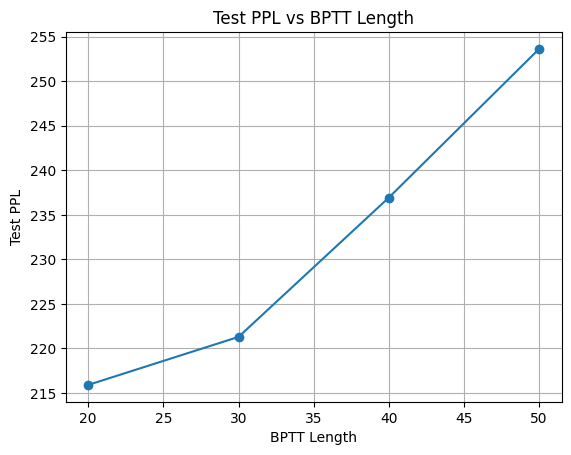

In [7]:
'''
Question2:
    We now vary the “bptt” length, while keeping all the other configurations same as question 1.
    Plot test PPL’s of LSTM and transformer for a range of “bptt” lengths, and discuss the results
'''
# Assuming you have a list of different bptt values you want to try
bptt_values = [20, 30, 40, 50]  # Example values
ppl_results = []
for bptt in bptt_values:
    command = f"python3 main.py --epochs 1 --bptt {bptt}"
    process = subprocess.run(command.split(), capture_output=True, text=True)
    test_ppl = extract_ppl_from_output(process.stdout)
    ppl_results.append(test_ppl)
    
# Plot the results
plt.plot(bptt_values, ppl_results, marker='o')
plt.xlabel('BPTT Length')
plt.ylabel('Test PPL')
plt.title('Test PPL vs BPTT Length')
plt.grid(True)
plt.show()

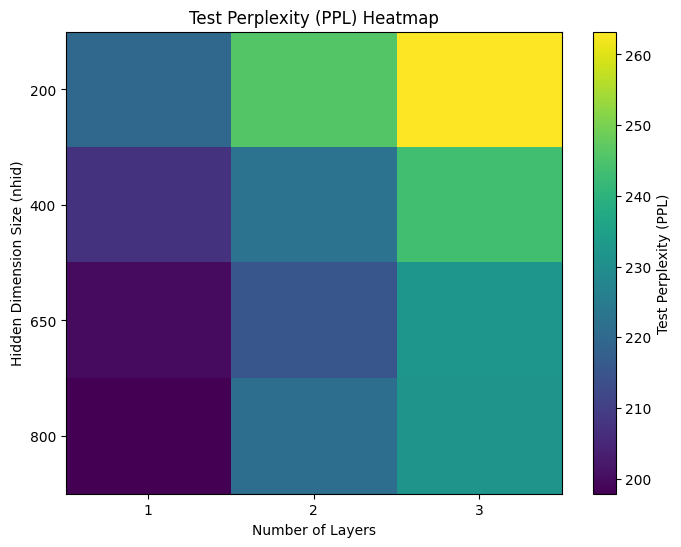

In [5]:
'''
Question3:
    In this question, we always set word embedding dimension equal to the hidden dimension, i.e.,
    use the same value for “emsize” and “nhid” when calling main.py. Let us keep the default “bptt”, and
    vary “nhid” and “nlayers”. Report test PPL’s for all (“nhid”, “nlayers”) tuples. It is suggested to
    visualize2 the PPL on 2D grids of “nhid”-“nlayers” coordindate, with a colorbar. Discuss the results.
'''

nhid_values = [200, 400, 650, 800]  # Example values
nlayers_values = [1, 2, 3]  # Example values

ppl_grid = np.zeros((len(nhid_values), len(nlayers_values)))

for i, nhid in enumerate(nhid_values):
    for j, nlayers in enumerate(nlayers_values):
        command = f"python3 main.py --emsize {nhid} --nhid {nhid} --nlayers {nlayers} --epochs 1"
        process = subprocess.run(command.split(), capture_output=True, text=True)
        ppl_grid[i, j] = extract_ppl_from_output(process.stdout)
        
        
# Plotting the results in a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(ppl_grid, cmap='viridis', aspect='auto')
plt.colorbar(label='Test Perplexity (PPL)')
plt.xticks(ticks=np.arange(len(nlayers_values)), labels=nlayers_values)
plt.yticks(ticks=np.arange(len(nhid_values)), labels=nhid_values)
plt.xlabel('Number of Layers')
plt.ylabel('Hidden Dimension Size (nhid)')
plt.title('Test Perplexity (PPL) Heatmap')
plt.show()

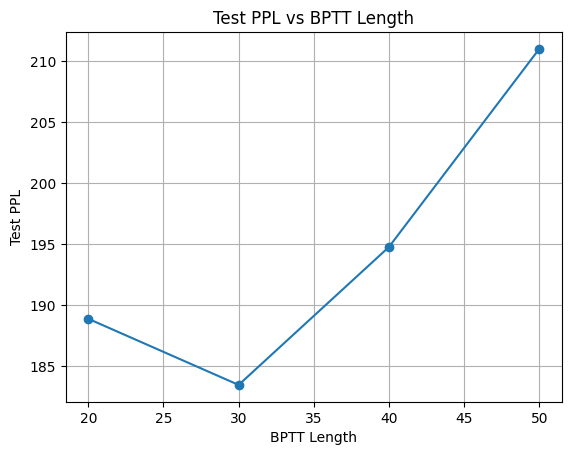

In [8]:
'''
Question4:
    Take the best ‘nhid”-“nlayers” configuration you get in question 3.
    Apply the corresponding model to test data, but with a varying “bptt”. This simulates a situation
    with length mismatch between training and testing. Discuss the results.
'''

best_nhid = 800  # This should be set to the best nhid value you found
best_nlayers = 1  # This should be set to the best nlayers value you found

bptt_values = [20, 30, 40, 50]  # Example values, these should vary as required
ppl_results = []
for bptt in bptt_values:
    command = f"python3 main.py --emsize {best_nhid} --nhid {best_nhid} --nlayers {best_nlayers} --epochs 1 --bptt {bptt}"
    process = subprocess.run(command.split(), capture_output=True, text=True)
    test_ppl = extract_ppl_from_output(process.stdout)
    ppl_results.append(test_ppl)
    
# Plot the results
plt.plot(bptt_values, ppl_results, marker='o')
plt.xlabel('BPTT Length')
plt.ylabel('Test PPL')
plt.title('Test PPL vs BPTT Length')
plt.grid(True)
plt.show()

